# If database unbuilt: Run All
## If database built, begin at "Load Engines" with correct directory

In [1]:
## Imports

import glob
import os

import random

# Import local modules containing all functions
from helpers import *

In [2]:
## Load all sample files

filedir = "/Volumes/External Storage/Thesis" #"/Users/aaronkarp/Documents/Thesis/Code"
segment_length = 0.1  # length of segments in seconds

sounds, samplerates, names, unused_names = load_sounds(filedir, cut=70)
spectrograms, mfccs, rmss, centroids, max_num_segs = analyze_sounds(sounds, samplerates, segment_length, what_feat="spectrogram")

num_files = len(sounds)

to_save = [['samplerates', samplerates], ['spectrograms', spectrograms], ['mfccs', mfccs], ['rmss', rmss], ['centroids', centroids]]
#save_data(to_save, filedir+"/savedData")
save_names(names, unused_names, directory=filedir)

/Volumes/External Storage/Thesis
Loading...
1%     2%     3%     4%     5%     6%     7%     8%     9%     10%     11%     12%     13%     14%     15%     16%     17%     18%     19%     20%     21%     22%     23%     24%     25%     26%     27%     28%     29%     30%     31%     32%     33%     34%     35%     36%     37%     38%     39%     40%     41%     42%     43%     44%     45%     46%     47%     48%     49%     50%     51%     52%     53%     54%     55%     56%     57%     58%     59%     60%     61%     62%     63%     64%     65%     66%     67%     68%     69%     70%     71%     72%     73%     74%     75%     76%     77%     78%     79%     80%     81%     82%     83%     84%     85%     86%     87%     88%     89%     90%     91%     92%     93%     94%     95%     96%     97%     98%     99%     100%     Finished Loading in 909.8416090011597 seconds, or 15.164026816685995 minutes
Using 10196 / 14444 files ~= 70.58986430351703%
Analyzing...
1%     2%     3%     4%   

In [3]:
## Organize features into lists of segments
# feature1 = [segment1 segment2 segment3]
# segment1 = nxm np.matrix 

spectrograms_by_seg_flat = segment_matrix(spectrograms, max_num_segs, num_files)
#mfccs_by_seg_flat = segment_matrix(mfccs, max_num_segs, num_files)
#centroids_by_seg_flat = segment_matrix(centroids, max_num_segs, num_files)

In [4]:
## Build/save LSHs for all features

spec_engines = []
#mfcc_engines = []
#centroid_engines = []
num_bits = 20 # How many bits to use for hashing

start = time.time()
for seg in spectrograms_by_seg_flat:
    spec_engines.append(build_lsh(seg, num_bits))
end = time.time()
print("Built in " + str(end-start) + " seconds, or " + str((end-start)/60.0) + " minutes")
#for seg in mfccs_by_seg_flat:
#    mfcc_engines.append(build_lsh(seg, num_bits))
#for seg in centroids_by_seg_flat:
#    centroid_engines.append(build_lsh(seg, num_bits))
    
save_directory = filedir+'/savedBases/'
reboot_directory(path=save_directory)
save_engines(spec_engines, 'spectrogram', directory=save_directory)
#save_engines(mfcc_engines, 'mfcc', directory=save_directory)
#save_engines(centroid_engines, 'centroid', directory=save_directory)

Built in 14.601457118988037 seconds, or 0.24335761864980063 minutes


In [5]:
## Load engines

spec_engines = load_engines('spectrogram', directory=save_directory)
#mfcc_engines = load_engines('mfcc')
#centroid_engines = load_engines('centroid')

Original query: /Volumes/External Storage/Thesis/Corpus/eng-wcp-us/flac/En-us-north.flac


Best guess: 4177


Second best guess: 292


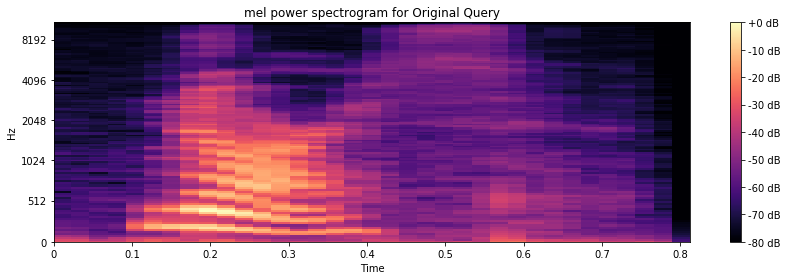

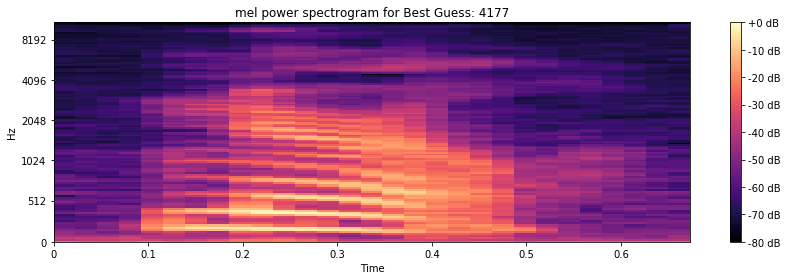

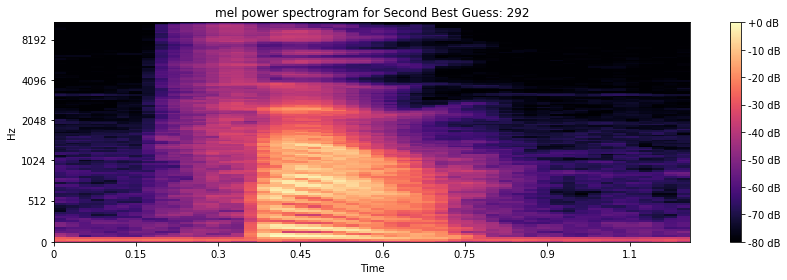

Guesses: 4177 : 0.004715487654309181
292 : 0.004838343627981967
6365 : 0.005001869597120123
4012 : 0.005051498566057355
6052 : 0.0050877229718269135
Query time: 2.4970550537109375 seconds, or 0.04161758422851562 minutes


In [6]:
## Query

# Load unused sounds and choose random one
f = open(filedir + '/unsampledFiles.txt', "r")
unused_files = f.read().split('\n')
to_check = random.choice(unused_files)

used_f = open(filedir + '/sampledFiles.txt', "r")
used_files = used_f.read().split('\n')

# Do the ANN distances

cum_distances = [0]*num_files  # The combined distance measures

start = time.time()

#guesses, distances = query_sound(to_check, centroid_engines, num_files, sounds, samplerates, segment_length = segment_length,
#                                 display=True, match_type='centroid')
#print("Guesses: ", end='')
#for x in guesses[:5]:
#    print(str(x) + " : " + str(distances[x]))
#cum_distances = [sum(x) for x in zip(distances, cum_distances)]
      
#guesses, distances = query_sound(to_check, mfcc_engines, num_files, sounds, samplerates, segment_length = segment_length,
#                                 display=True, match_type='mfcc')
#print("Guesses: ", end='')
#for x in guesses[:5]:
#    print(str(x) + " : " + str(distances[x]))
#cum_distances = [sum(x) for x in zip(distances, cum_distances)]

guesses, distances = query_sound(to_check, spec_engines, num_files, sounds, samplerates, segment_length = segment_length,
                                 display=True, match_type='spectrogram')
print("Guesses: ", end='')
for x in guesses[:5]:
    print(str(x) + " : " + str(distances[x]))
cum_distances = [sum(x) for x in zip(distances, cum_distances)]

cum_guesses = sorted(range(len(cum_distances)), key=lambda k : cum_distances[k])

end = time.time()
print("Query time: " + str(end-start) + " seconds, or " + str((end-start)/60.0) + " minutes")


#print("\n\nOriginal Query: ")
#y,sr = librosa.load(to_check)
#ipd.display(ipd.Audio(y, rate=sr)) # load matched file
#print("\nBest guesses: ")
#for i in range(0, 4):
#    print("Sound #" + str(cum_guesses[i]) + " : " + str(cum_distances[cum_guesses[i]]))
#    ipd.display(ipd.Audio(sounds[cum_guesses[i]], rate = samplerates[cum_guesses[i]])) # load matched file